In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Model Building Steps

Data Preprocessing

In [3]:
CCP = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv')
CCP.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
CCP.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [5]:
CCP.shape

(10000, 12)

In [6]:
CCP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
CCP.describe().round()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.0,8.0,1.0,2.0,1.0,79.0,4.0,69.0,75.0
std,2887.0,1.0,1.0,1.0,1.0,8.0,0.0,10.0,9.0
min,1.0,6.0,0.0,0.0,0.0,60.0,3.0,55.0,57.0
25%,2501.0,7.0,1.0,1.0,0.0,73.0,4.0,59.0,67.0
50%,5000.0,8.0,1.0,2.0,1.0,80.0,4.0,70.0,73.0
75%,7500.0,8.0,1.0,3.0,2.0,87.0,5.0,78.0,83.0
max,10000.0,9.0,2.0,3.0,3.0,90.0,5.0,90.0,88.0


In [8]:
CCP.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


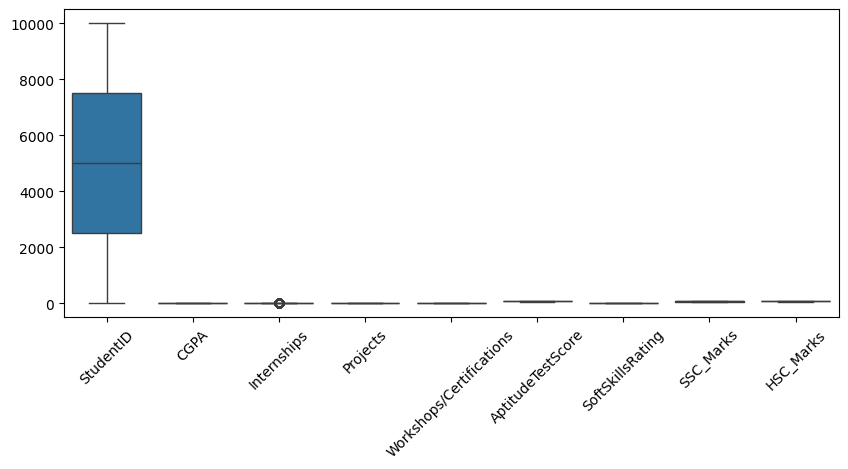

In [9]:
plt.figure(figsize = (10,4))
sns.boxplot(CCP)
plt.xticks(rotation = 45)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
CCP['ExtracurricularActivities'] = le.fit_transform(CCP['ExtracurricularActivities'])
CCP['PlacementTraining'] = le.fit_transform(CCP['PlacementTraining'])
CCP['PlacementStatus'] = le.fit_transform(CCP['PlacementStatus'])


In [11]:
CCP[['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']]

,ExtracurricularActivities,PlacementTraining,PlacementStatus
0,0,0,0
1,1,1,1
2,1,0,0
3,1,1,1
4,1,1,1
...,...,...,...
9995,1,0,0
9996,0,0,1
9997,1,1,1
9998,1,1,1


In [12]:
x = CCP[['PlacementTraining']]
y = CCP['PlacementStatus']

from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(score_func= f_classif, k= 1)
new = select.fit_transform(x, y)
feature_scores = select.scores_
print('feature scores:\n', feature_scores)
x.columns[select.get_support(indices= True)]
print('selected Feature:\n', x.columns[select.get_support(indices= True)] )
selected_CCP = pd.DataFrame(CCP, columns = x.columns[select.get_support(indices= True)])
print('Transformed dataset with selected CCP:\n ', selected_CCP)

feature scores:
 [1169.89746791]
selected Feature:
 Index(['PlacementTraining'], dtype='object')
Transformed dataset with selected CCP:
        PlacementTraining
0                     0
1                     1
2                     0
3                     1
4                     1
...                 ...
9995                  0
9996                  0
9997                  1
9998                  1
9999                  0

[10000 rows x 1 columns]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 27)
print(f'Dataset shape:\n {CCP.shape}')
print(f'x_train shape:\n {x_train.shape}')
print(f'x_test shape:\n {x_test.shape}')
print(f'y_train shape:\n {y_train.shape}')
print(f'y_test shape:\n {y_test.shape}')

Dataset shape:
 (10000, 12)
x_train shape:
 (8000, 1)
x_test shape:
 (2000, 1)
y_train shape:
 (8000,)
y_test shape:
 (2000,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
CCP_standardize = scaler.fit_transform(CCP)

In [15]:
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
x_test_scaled = scaler.fit_transform(x_test)

Logistic Regression - Model Building and Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 300)
model.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [120]:
y_pred = model.predict(x_test_scaled)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)
print(f'Accuracy = {accuracy_score (y_test, y_pred)*100}%')

Accuracy = 57.95%


Decision Tree - Model Building and Evaluation

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

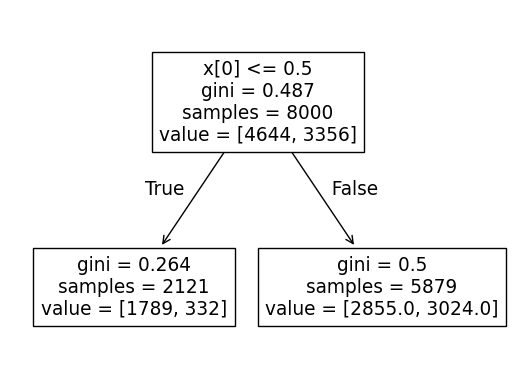

In [51]:
plot_tree(dt)
plt.show()

In [126]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [127]:
accuracy_score (y_test, y_pred)
print(f'Accuracy = {accuracy_score(y_test, y_pred)*100}%')

Accuracy = 61.5%


K-Nearest Neighbors (KNN) - Model Building and Evaluation

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [129]:
y_pred = knn.predict(x_test_scaled)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 1, 1])

In [130]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(f'Accuracy = {accuracy*100}%')

Accuracy = 61.5%


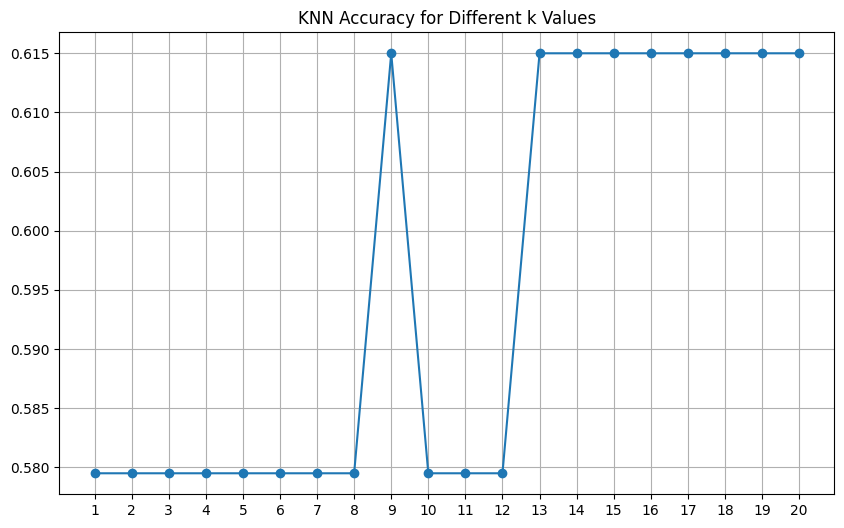

In [82]:
plt.figure(figsize=(10,6))
plt.plot( k_values, accuracy_scores, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [105]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)
print(f"\nBest k: {best_k} with Accuracy: {best_accuracy:.2f}")


Best k: 9 with Accuracy: 0.61


#Comparison and Analysis



#### Logistic Regression
- **Strengths**: Easy to interpret, works well with linearly separable data.
- **Weaknesses**: Poor performance on non-linear or complex datasets like this one.


#### Decision Tree
- **Strengths**: Handles non-linearity, categorical data, and interactions between features.
- **Weaknesses**: Prone to overfitting; requires tuning (e.g., depth).


#### K-Nearest Neighbors
- **Strengths**: Simple, non-parametric, effective with good distance metrics.
- **Weaknesses**: Sensitive to noise and scaling, computationally expensive on large datasets.

